In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the code."></form>''')

# Exploratory Analysis on Brand Impact Survey

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# this allows plots to appear directly in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
# pip install patsy
# pip install statsmodels
import statsmodels.formula.api as smf
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

from IPython.core.display import display, HTML

## - Transaction Data 
### How data looks like

In [4]:
# read data file
url_transaction = '/Users/shaokuixing/Desktop/whatever/survey_delivery_event_inscreen20160522.csv'
trans = pd.read_csv(url_transaction, sep='\t', thousands = '.', decimal =',')
trans.sample(n=3,random_state=23)

,surveyid,answersetid,uid,deliveryid,adspaceid,apptype,apptypegroupid,iab_adspace_category,originaladid,iab_ad_category,adname,templatetype,size,video,streamview,storelocator,swipe,iosversion,androidversion,platform,modelid,screensize,screenwidth,browserid,browser,sdkclientid,sdkclientname,ipcity,contype,con,rss,click,firstinteraction,close,click_adjusted,close_adjusted,vtabove0pct,vtabove10pct,vtabove20pct,vtabove30pct,vtabove40pct,vtabove50pct,vtabove60pct,vtabove70pct,vtabove80pct,vtabove90pct,vtabove100pct
38126,447,347127,2372328936987073210,93907940568,3631,IPHONE_APP,MOBILE_APP,Arts & Entertainment,38658,Gambling/Casino,OSE002897 Casumo Januari Adsync Takeover - AdS...,swipe,takeover,0,0,0,1,19000,(null),ios,104772,4.7,750,7,Mobile Safari,1,iossdk,(null),lte,3,(null),0,0,1,0,1,1798,1798,1798,1798,1798,1798,1798,1798,1798,1798,1798
8060,498,394389,413866027122445885,97261102528,7526,MOBILE_WEB,MOBILE_WEB,Style & Fashion,39435,Food & Drink,"OFI001807 Bunge Finland Oy Bunge, Älva Ruotsi ...",takeover,takeover,0,0,0,0,19100,(null),ios,110834,4.7,750,7,Mobile Safari,5,dynamic,Eslöv,(null),3,(null),0,0,0,0,0,63,63,63,63,63,63,63,63,63,63,63
79930,316,235532,6834545996892502619,87254645084,1947,MOBILE_WEB,MOBILE_WEB,Sports,35772,U.S. Government Resources,OSE002723 Försvarsmakten Officer Takeover -Sta...,takeover,takeover,0,0,0,0,(null),25100,android,106563,5.0,1080,2,Chrome Mobile,5,dynamic,Stockholm,(null),0,(null),0,0,0,0,0,23571,23571,23571,23571,23571,23571,23571,23571,23571,23571,0


### Scope 

In [5]:
# unique values
print 'number of surveys:', trans.surveyid.nunique()
print 'number of interviews:', trans.answersetid.nunique()
print 'number of unique interviewees:', trans.uid.nunique()
print 'number of unique impressions:', trans.deliveryid.nunique()
print 'number of unique publisher ad spaces:', trans.adspaceid.nunique()
#print 'number of unique publisher category by IAB Def:', trans.iab_adspace_category.nunique()
#print 'number of unique advertiser category by IAB Def:', trans.iab_ad_category.nunique()
print 'unique ad template:', trans.templatetype.unique()
#print 'unique ad size:', trans['size'].unique()

number of surveys: 195
number of interviews: 23269
number of unique interviewees: 21259
number of unique impressions: 115916
number of unique publisher ad spaces: 1240
unique ad template: ['swipe' 'takeover' 'split_video_ad' 'adbuilder' 'interstitial']


In [6]:
#trans.dtypes
trans1=trans.copy()
#replace (null) to NAN
trans1 = trans1.replace('(null)', np.nan)
#convert categorical variables
trans1['apptype']=trans1['apptype'].astype('category', ordered=False)
trans1['apptypegroupid']=trans1['apptypegroupid'].astype('category', ordered=False)
trans1['iab_adspace_category']=trans1['iab_adspace_category'].astype('category', ordered=False)
trans1['iab_ad_category']=trans1['iab_ad_category'].astype('category', ordered=False)
trans1['templatetype']=trans1['templatetype'].astype('category', ordered=False)
trans1['size']=trans1['size'].astype('category', ordered=False)
trans1['iosversion']=trans1['iosversion'].astype('float')
trans1['androidversion']=trans1['androidversion'].astype('float')
trans1['platform']=trans1['platform'].astype('category',ordered=False)
trans1['modelid']=trans1['modelid'].astype('float')
trans1['screensize']=trans1['screensize'].astype('float')
trans1['screenwidth']=trans1['screenwidth'].astype('float')
trans1['browser']=trans1['browser'].astype('category',ordered=False)
trans1['sdkclientname']=trans1['sdkclientname'].astype('category',ordered=False)
trans1['contype']=trans1['contype'].astype('category',ordered=False)
trans1['con']=trans1['con'].astype('int')
trans1['rss']=trans1['rss'].astype('float')

### Description of Metrics / Continous Variables


In [7]:
#trans1[['con','rss','click','firstinteraction','close','click_adjusted]].describe()
trans1.ix[:,26:].describe()

,con,rss,click,firstinteraction,close,click_adjusted,close_adjusted,vtabove0pct,vtabove10pct,vtabove20pct,vtabove30pct,vtabove40pct,vtabove50pct,vtabove60pct,vtabove70pct,vtabove80pct,vtabove90pct,vtabove100pct
count,116718.000000,28236.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000,116718.000000
mean,2.007814,2.321316,0.013100,0.041305,0.260457,0.012012,0.254699,5570.779383,5570.779383,5063.135078,4745.624994,4472.007934,4233.969868,3982.898645,3779.025095,3572.781268,3399.746346,3239.672767
std,1.397450,1.557246,0.126812,0.201008,0.475107,0.108939,0.435694,19117.096633,19117.096633,18486.344103,17995.250163,17620.456896,17363.913182,17062.116840,16753.922301,16283.968553,16014.565639,15790.518169
min,0.000000,0.190340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.981636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.928929,0.000000,0.000000,0.000000,0.000000,0.000000,949.000000,949.000000,755.000000,583.000000,436.000000,313.500000,221.000000,167.000000,133.000000,113.000000,72.000000
75%,3.000000,3.521813,0.000000,0.000000,1.000000,0.000000,1.000000,4302.750000,4302.750000,3539.000000,3139.000000,2803.750000,2528.000000,2266.000000,2061.750000,1901.000000,1763.000000,1637.000000
max,3.000000,5.000000,8.000000,5.000000,32.000000,1.000000,1.000000,527479.000000,527479.000000,527479.000000,398852.000000,321423.000000,321270.000000,321244.000000,310958.000000,310722.000000,310635.000000,310593.000000


## Explore by specific variable

In [8]:
apptype_del=pd.DataFrame(trans1.groupby('apptype').deliveryid.nunique()).reset_index()



In [164]:
import plotly.plotly as py
import plotly.graph_objs as go
# from plotly import __version__
# from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
# init_notebook_mode() 
py.sign_in('mistertooth', '38103td8wi')

#help(trans1.iplot)
#https://github.com/santosjorge/cufflinks
# https://plot.ly/pandas/pie-charts/
# https://plot.ly/ipython-notebooks/cufflinks/

### Apptype

In [93]:
import cufflinks as cf
apptype_del.apptype=apptype_del.apptype.astype('object')
cf.set_config_file(world_readable=True,offline=True)
apptype_del.iplot(kind='pie',labels='apptype',values='deliveryid', dimensions=(900, 500),
                  title='Impression Distribution by AppType')

### Connection Speed

In [92]:
con_del=pd.DataFrame(trans1.groupby('con').deliveryid.nunique()).reset_index()
cf.set_config_file(world_readable=True,offline=True)
con_del.iplot(kind='pie',labels='con',values='deliveryid', dimensions=(900, 500),
                  title='Impression Distribution by Connection Speed')

### Recommender Strenghth Score

In [38]:
#pd.DataFrame(trans1.groupby('rss').deliveryid.nunique()).reset_index()
#print trans1.rss.isnull().values.sum()
#print trans1.rss.notnull().values.sum()
# trans1[pd.isnull(trans1).any(axis=1)].deliveryid.nunique()
print 'number of deliveries with null RSS', trans1[trans1['rss'].isnull()].deliveryid.nunique()
print 'number of deliveries with RSS', trans1[trans1['rss'].notnull()].deliveryid.nunique()

number of deliveries with null RSS 87897
number of deliveries with RSS 28019


In [45]:
from __future__ import division
print '% RSS among deliveries', round(28019/(28019+87897)*100,2)

% RSS among deliveries 24.17


### IAB Category

In [217]:

as_cat = pd.DataFrame(pd.pivot_table(trans1, values='deliveryid', 
                    columns=['iab_adspace_category'], aggfunc=lambda x: len(x.unique()))).reset_index()
as_cat.iab_adspace_category = as_cat.iab_adspace_category.astype(object)
as_cat['pct']= as_cat['deliveryid']/as_cat['deliveryid'].sum()*100
as_cat=as_cat.sort_values(by='pct', ascending=True)
as_cat.iplot(kind='barh',x='iab_adspace_category',y='pct',  dimensions=(900, 450),
             title='% Distribution of Publisher Category by IAB Standard')
print 'Top 5'
as_cat.tail().sort_values(by='pct', ascending=False)

Top 5


,iab_adspace_category,deliveryid,pct
0,Arts & Entertainment,40164,37.334771
10,News,12793,11.891837
16,Sports,12602,11.714291
17,Style & Fashion,9587,8.911673
7,Hobbies & Interests,7517,6.987488


In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

ad_cat1=ad_cat.sort_values(by='pct', ascending=False)

sns.set_color_codes("pastel")
#sns.barplot(x="pct", y="iab_ad_category", data=ad_cat1, label="Advertiser Category IAB", color="b")

In [219]:
ad_cat = pd.DataFrame(pd.pivot_table(trans1, values='deliveryid', 
                    columns=['iab_ad_category'], aggfunc=lambda x: len(x.unique()))).reset_index()
ad_cat.iab_ad_category = ad_cat.iab_ad_category.astype(object)
ad_cat['pct']= ad_cat['deliveryid']/as_cat['deliveryid'].sum()*100
ad_cat=ad_cat.sort_values(by='pct', ascending=True)
ad_cat.iplot(kind='barh',x='iab_ad_category',y='pct',  dimensions=(800, 450), color='blue',
#             barmode='stack',bargap=.5,
             title='% Distribution of Advertiser Category by IAB Standard')
print 'top 5'
ad_cat.tail().sort_values(by='pct', ascending=False)

top 5


,iab_ad_category,deliveryid,pct
18,Travel,16221,15.078362
1,Automotive,14011,13.024038
0,Appliances,12911,12.001524
9,Food & Drink,12346,11.476324
10,Gambling/Casino,11329,10.530964


In [184]:
# trans1.dtypes

### Events

In [115]:
#print trans1.click_adjusted.sum()
#print trans1.firstinteraction.sum()
#print trans1.close_adjusted.sum()
print 'click', trans1[trans1['click']==1].deliveryid.nunique()
print 'close', trans1[trans1['close']==1].deliveryid.nunique()
print '1st_Interaction', trans1[trans1['firstinteraction']>=1].deliveryid.nunique()
print 'delivery', trans1.deliveryid.nunique()
print 'Click Rate %', round(1295/115916*100,2)
print 'Close Rate %', round(28967/115916*100,2)
print 'Interaction Rate %', round(4693/115916*100,2)

click 1295
close 28967
1st_Interaction 4693
delivery 115916
Click Rate % 1.12
Close Rate % 24.99
Interaction Rate % 4.05


### Time In Screen

In [183]:
#data3['bins_spd'] = pd.qcut(data3['spd_pct'].values, 5).codes
trans1['vt50sec']=trans1['vtabove50pct']/1000
trans1.vt50sec=trans1.vt50sec.astype(int)

ic50=pd.DataFrame(pd.pivot_table(trans1, values='deliveryid', 
                    columns=['vt50sec'], aggfunc=lambda x: len(x.unique()))).reset_index()

ic50=ic50.sort_values(by='vt50sec', ascending=True)
ic50.head(20).iplot(kind='bar',x='vt50sec', y='deliveryid',  color='yellow', dimensions=(800, 450),
                    fill=True,
                    title='Deliveries by Time Inscreen Per Second, above 50pct')


### Browser

Top 5


,browser,deliveryid
13,Mobile Safari,65343
3,Chrome Mobile,20507
5,Chromium,16196
17,Samsung Browser,6683
8,FaceBook on iOS,5627


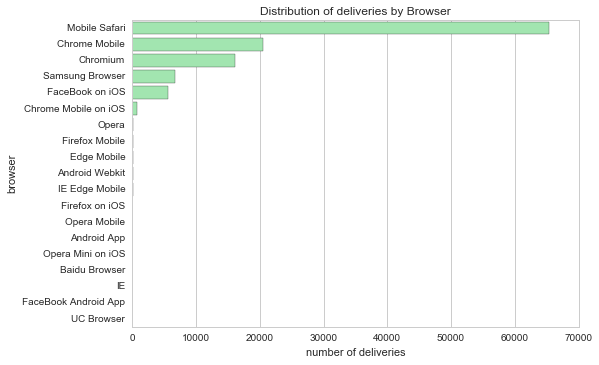

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
brow = pd.DataFrame(pd.pivot_table(trans1, values='deliveryid', 
                    columns=['browser'], aggfunc=lambda x: len(x.unique()))).reset_index()
# brow.browser = brow.browser.astype(object)
# brow['pct']= brow['deliveryid']/brow['deliveryid'].sum()*100
brow=brow.sort_values(by='deliveryid', ascending=False)
sns.set_color_codes("pastel")
order = list(brow['browser'])
sns.barplot(x="deliveryid", y="browser", data=brow, label="browser", color="g", order=order)
plt.xlabel('number of deliveries')
plt.title('Distribution of deliveries by Browser')
print 'Top 5'
brow.head(5)

In [220]:
trans1.dtypes

surveyid                   int64
answersetid                int64
uid                        int64
deliveryid                 int64
adspaceid                  int64
apptype                 category
apptypegroupid          category
iab_adspace_category    category
originaladid               int64
iab_ad_category         category
adname                    object
templatetype            category
size                    category
video                      int64
streamview                 int64
storelocator               int64
swipe                      int64
iosversion               float64
androidversion           float64
platform                category
modelid                  float64
screensize               float64
screenwidth              float64
browserid                  int64
browser                 category
sdkclientid                int64
sdkclientname           category
ipcity                    object
contype                 category
con                        int64
rss       

In [246]:
from bokeh.io import output_notebook, show
output_notebook()


Loading BokehJS ...

In [247]:
from bokeh.sampledata.world_cities import data
# data.head()

city = trans1[['deliveryid','ipcity']].reset_index()
city.rename(columns={'ipcity':'name'}, inplace=True)

newcity=pd.merge(data, city, how='inner', on='name', left_on=None, right_on=None,
     left_index=False, right_index=False, sort=True,
      copy=True, indicator=False)

print newcity.name.nunique()
print city.name.nunique()

1708
3569
